In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  '#373e4b',
    "axes.facecolor": '#373e4b',
})

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  '#373e4b',
    "axes.facecolor": '#373e4b',
})

# Dataset

### $$X = \begin{bmatrix} x^{(1)} \\ \vdots  \\ x^{(m)} \end{bmatrix}$$
### $$y = \begin{bmatrix} y^{(1)}\\ \vdots \\y^{(m)} \end{bmatrix}$$

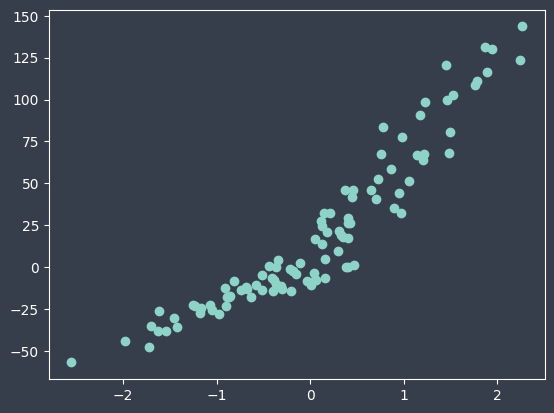

In [4]:
np.random.seed(0)

x, y = make_regression(n_samples=100, n_features=1, noise = 10) # creation d'un dataset (x, y) linéaire
y = y + abs(y/2) # modifie les valeurs de y pour rendre le dataset non-linéaire

plt.scatter(x, y)

In [5]:
# redimensionner y
y = y.reshape(y.shape[0], 1)
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


# Initialisation

### $$X = \begin{bmatrix} x^{2 (1)} & x^{(1)} & 1 \\ ... & ... & ... \\ x^{2 (m)} & x^{(m)} & 1 \end{bmatrix}$$
### $$\theta = \begin{bmatrix} a\\b\\c \end{bmatrix}$$

In [6]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X)) # ajoute le vecteur x^2 a la gauche de la matrice X

print(X.shape)
print(X[:10])

(100, 3)
[[ 0.12927848 -0.35955316  1.        ]
 [ 0.95382381  0.97663904  1.        ]
 [ 0.1618788   0.40234164  1.        ]
 [ 0.66120688 -0.81314628  1.        ]
 [ 0.78816353 -0.88778575  1.        ]
 [ 0.19701457  0.44386323  1.        ]
 [ 0.95507205 -0.97727788  1.        ]
 [ 0.18346819  0.42833187  1.        ]
 [ 0.04337847  0.20827498  1.        ]
 [ 0.09706498 -0.31155253  1.        ]]


In [7]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(3, 1)
theta

array([[-0.63743703],
       [-0.39727181],
       [-0.13288058]])

# Modèle

### $$F = X.\theta$$

In [8]:
def model(X, theta):
    return X.dot(theta)

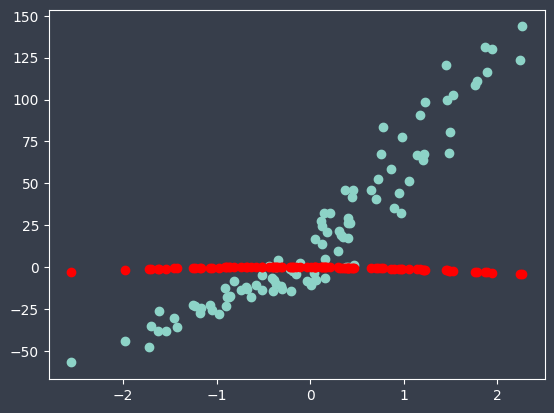

In [9]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')

# Fonction Cout :  Erreur Quadratique moyenne

### $$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $$

In [10]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [11]:
cost_function(X, y, theta)

1328.6654828872622

# Gradients

### $$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$$

In [12]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

# Descente de Gradient

### $$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$$

In [13]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations)
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history

# Phase d'entraînement

In [14]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [15]:
theta_final # Parametres du modèle une fois que la machine a été entrainée

array([[ 8.60077615],
       [42.23116732],
       [ 8.18143081]])

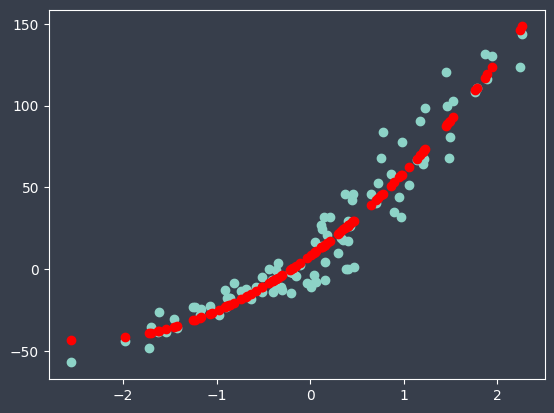

In [17]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

plt.scatter(x, y)
plt.scatter(x, predictions, c='r')

# Courbe d'apprentissage

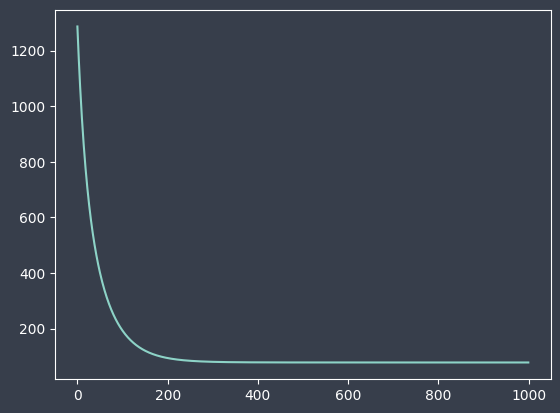

In [18]:
plt.plot(range(n_iterations), cost_history)

# Evaluation finale

### $${\displaystyle R^{2}=1-{\dfrac {\sum _{i=1}^{n}\left(y_{i}-{y_{i, \text{pred} }}\right)^{2}}{\sum _{i=1}^{n}\left(y_{i}-{\bar {y}}\right)^{2}}}}$$

In [19]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [20]:
coef_determination(y, predictions)

0.9287186469389942